In [9]:
"""
Vikas Dangi
B20238
DS3-Lab 3
"""
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Question 1

df=pd.read_csv("pima-indians-diabetes.csv")
df=df.iloc[:,:8]
#calculating various parameters like median and quartiles and IQR
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
median=df.quantile(0.5)
limit1=q1-1.5*iqr
limit2=q3+1.5*iqr
#This is function to clean outliers by replacing them with median
def cleanOutliers(clm):
    df[clm]=np.where(df[clm] < limit1[clm], median[clm], df[clm])
    df[clm]=np.where(df[clm] > limit2[clm], median[clm], df[clm])

# using the function to replace outliers of all the colummns
for i in df.columns:
    cleanOutliers(i)


#A
df_normal=df.copy()

# normalizing the data using min max normalization
for i in df_normal.columns:
    df_normal[i]=(df_normal[i]-df_normal[i].min())/(df_normal[i].max()-df_normal[i].min()) * (12-5) + 5

#printing the results
print("\nThe minimum values before performing the Min-Max normalization of the attributes: ")
print(df.min())
print("\nThe minimum values after performing the Min-Max normalization of the attributes: ")
print(df_normal.min())
print("\nThe maximum values before performing the Min-Max normalization of the attributes: ")
print(df.max())
print("\nThe maximum values after performing the Min-Max normalization of the attributes: ")
print(df_normal.max())



#B
#printing the results
print("\nThe mean before the standardization: ")
print(df.mean())
print("\nThe standard deviations before the standardization: ")
print(df.std())

#standarization of the data
df=(df-df.mean())/df.std()

print("\nThe mean after the standardization: ")
print(df.mean())
print("\nThe standard deviations after the standardization: ")
print(df.std())



The minimum values before performing the Min-Max normalization of the attributes: 
pregs     0.000
plas     44.000
pres     38.000
skin      0.000
test      0.000
BMI      18.200
pedi      0.078
Age      21.000
dtype: float64

The minimum values after performing the Min-Max normalization of the attributes: 
pregs    5.0
plas     5.0
pres     5.0
skin     5.0
test     5.0
BMI      5.0
pedi     5.0
Age      5.0
dtype: float64

The maximum values before performing the Min-Max normalization of the attributes: 
pregs     13.000
plas     199.000
pres     106.000
skin      63.000
test     318.000
BMI       50.000
pedi       1.191
Age       66.000
dtype: float64

The maximum values after performing the Min-Max normalization of the attributes: 
pregs    12.0
plas     12.0
pres     12.0
skin     12.0
test     12.0
BMI      12.0
pedi     12.0
Age      12.0
dtype: float64

The mean before the standardization: 
pregs      3.782552
plas     121.656250
pres      72.196615
skin      20.437500
test   

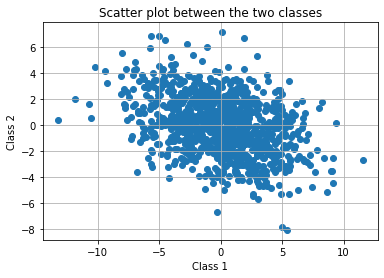

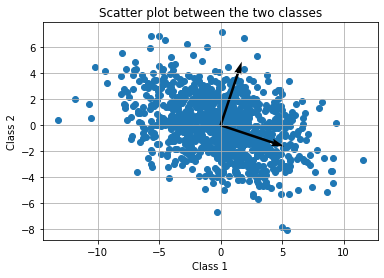

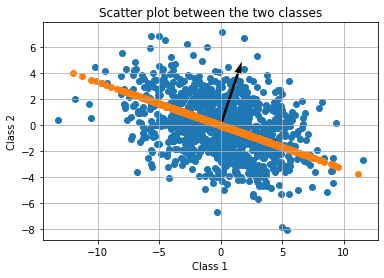

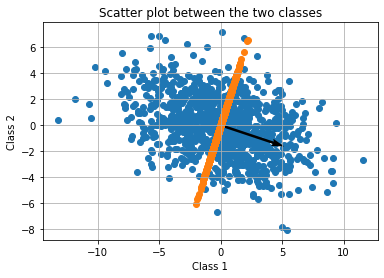

The eucildian error between the reconstructed and the original data is: 
2.6611755040126536e-16


In [10]:
#Question 2

#funtion to plot scatter plot
def sctrplt(x,y):
    plt.scatter(x,y)
    plt.grid(True)
    plt.xlabel("Class 1")
    plt.ylabel("Class 2")
    plt.title("Scatter plot between the two classes")

meanMTX=[0,0]
covMTX = [[13, -3], [-3, 5]]
#creating data set
x = np.random.multivariate_normal(meanMTX, covMTX,1000)
synData=pd.DataFrame(x)

#A
#plottig the generated data
sctrplt(synData[0],synData[1])
plt.show()


#B

#calculating the eigen values and vectors
w, v = np.linalg.eig(covMTX)

fig, ax = plt.subplots()
xpos=[meanMTX[0],meanMTX[0]]
ypos=[meanMTX[1],meanMTX[1]]
sctrplt(synData[0],synData[1])
#plotting it with arrows in direction of eigen vectors
ax.quiver(xpos,ypos,v[0],v[1], scale=5)
plt.show()

#C

#projecting the data 1st eigen vector
projected1=np.dot(x,v[:,0])
xstr=projected1*(v[0][0]/math.sqrt((v[0][0]**2+v[1][0]**2)))
ystr=projected1*(v[1][0]/math.sqrt((v[0][0]**2+v[1][0]**2)))
fig, ax = plt.subplots()
sctrplt(synData[0],synData[1])
#plotting it with arrows in direction of eigen vectors
ax.quiver(xpos,ypos,v[0],v[1], scale=5)
sctrplt(xstr,ystr)
plt.show()

#projecting the data on second eigen vector
projected2=np.dot(x,v[:,1])
xstr=projected2*(v[0][1]/math.sqrt((v[0][1]**2+v[1][1]**2)))
ystr=projected2*(v[1][1]/math.sqrt((v[0][1]**2+v[1][1]**2)))
fig, ax = plt.subplots()
sctrplt(synData[0],synData[1])
#plotting it with arrows in direction of eigen vectors
ax.quiver(xpos,ypos,v[0],v[1], scale=5)
sctrplt(xstr,ystr)
plt.show()

#D

#stacking both the eigen vectors along the columns
projected=np.stack((projected1,projected2),axis=-1)
reconstructed=np.dot(projected,np.transpose(v))

# Function to calculate euclidian error
def euclidian(a,b):
    dis=np.sqrt(np.sum((np.square(a-b)),axis=1))
    return sum(dis)/len(a)
#printing the results
print("The eucildian error between the reconstructed and the original data is: ")
print(euclidian(reconstructed,x))

#testing eigen values and variance values
# xmen=pd.DataFrame(projected)
# print("Eigen Values: ",w)
# print("Variance\n",xmen.var())



The variance of the projected data along the two directions is: 
 [1.98986869 1.85100888]

The eigenvalues of the two directions of projection are: 
 [1.99246305 1.85342219]


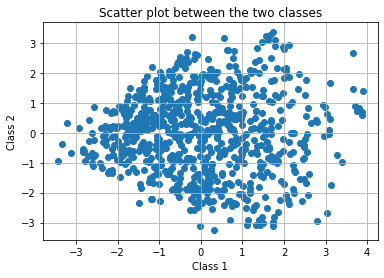


The eigenvalues in the descending order: 
 [1.99246305 1.85342219 0.98187914 0.85830733 0.8387496  0.63640837
 0.43414282 0.40462751]


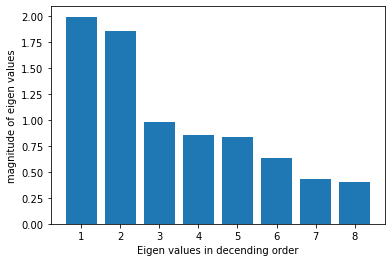

The covariance matrix of the transformed data with l= 1  is: 
          0
0  1.992463
The covariance matrix of the transformed data with l= 2  is: 
              0             1
0  1.992463e+00  1.672138e-15
1  1.672138e-15  1.853422e+00
The covariance matrix of the transformed data with l= 3  is: 
              0             1             2
0  1.992463e+00 -4.099285e-16  1.250629e-16
1 -4.099285e-16  1.853422e+00  5.743631e-16
2  1.250629e-16  5.743631e-16  9.818791e-01
The covariance matrix of the transformed data with l= 4  is: 
              0             1             2             3
0  1.992463e+00  1.199678e-15 -1.366428e-16  2.408619e-16
1  1.199678e-15  1.853422e+00  2.941295e-16  1.227470e-16
2 -1.366428e-16  2.941295e-16  9.818791e-01  5.789951e-17
3  2.408619e-16  1.227470e-16  5.789951e-17  8.583073e-01
The covariance matrix of the transformed data with l= 5  is: 
              0             1             2             3             4
0  1.992463e+00 -1.667506e-16  2.77917

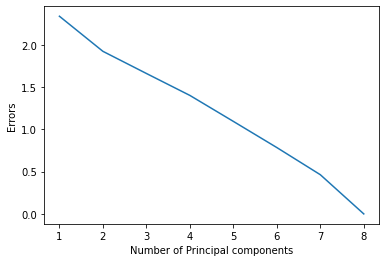

the covariance matrix for the original data (8-dimensional): 
          pregs      plas      pres      skin      test       BMI      pedi  \
pregs  1.000000  0.117692  0.208953 -0.096720 -0.108474  0.028339  0.004519   
plas   0.117692  1.000000  0.204539  0.060034  0.179566  0.228245  0.081613   
pres   0.208953  0.204539  1.000000  0.025645 -0.050956  0.271560  0.022495   
skin  -0.096720  0.060034  0.025645  1.000000  0.472714  0.373726  0.152763   
test  -0.108474  0.179566 -0.050956  0.472714  1.000000  0.171503  0.198580   
BMI    0.028339  0.228245  0.271560  0.373726  0.171503  1.000000  0.123776   
pedi   0.004519  0.081613  0.022495  0.152763  0.198580  0.123776  1.000000   
Age    0.560768  0.274264  0.326372 -0.101397 -0.073726  0.077668  0.036109   

            Age  
pregs  0.560768  
plas   0.274264  
pres   0.326372  
skin  -0.101397  
test  -0.073726  
BMI    0.077668  
pedi   0.036109  
Age    1.000000  

the covariance matrix for 8-dimensional representation obtained

In [11]:
#Question 3

#A

# calculating covariance matrix of the data
covM=df.cov()
#calculating the eigen values and vectors
ew, ev = np.linalg.eig(covM)

# importing the sklearn module
from sklearn.decomposition import PCA
# creating a pca object with 2 components
pca=PCA(n_components=2)
pca.fit(df)
# finally transforming the data
x_pca=pca.transform(df)
#printing the variance and eigen values and variance
print("\nThe variance of the projected data along the two directions is: \n",x_pca.var(axis=0))
print("\nThe eigenvalues of the two directions of projection are: \n",ew[0:2])
# plotting the scatter plot of the transformed data
sctrplt(x_pca[:,0],x_pca[:,1])
plt.show()

#B

#printing the results
print("\nThe eigenvalues in the descending order: \n",np.sort(ew)[::-1])
# plotting the bar plot
plt.bar(np.arange(1,9),np.sort(ew)[::-1])
plt.xlabel("Eigen values in decending order")
plt.ylabel("magnitude of eigen values")
plt.show()

#C
#creating an array to store all the errors
errors=np.array([])
#storing values of l
l=np.arange(1,9)
#a for loop to do projections and calculations for all values of l
for i in l:
    pca=PCA(n_components=i)
    pca.fit(df)
    tD=pd.DataFrame(pca.transform(df))
    print("The covariance matrix of the transformed data with l=",i," is: ")
    print(tD.cov())
    rD=pca.inverse_transform(tD)
    errors=np.append(errors,euclidian(rD,df))
#plotting the errors with l
print("\nThe plot errors of the reconstructed data with the original along with number of Principal components: \n")
plt.plot(l,errors)
plt.xlabel("Number of Principal components")
plt.ylabel("Errors")
plt.show()

#D
#printing covariance matrix of original data
print("the covariance matrix for the original data (8-dimensional): ")
print(covM)
pca=PCA(n_components=8)
pca.fit(df)
tD8=pd.DataFrame(pca.transform(df))
#printing covariance matrix of transformed data
print("\nthe covariance matrix for 8-dimensional representation obtained using PCA with l = 8: \n")
print(tD8.cov())


In [12]:
def minMax(df):
    clm=df.columns()
    
    for i in range(clm):
        min=df[i].min()
        max=df[i].max()
        df[i]=((df[i]-min)/(max-min))
    return df
def standardrise():

IndentationError: expected an indented block (Temp/ipykernel_2748/3152664085.py, line 9)